<a href="https://colab.research.google.com/github/Hammadtahir7/Card-Fraud-Detection/blob/master/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#to upload data file from local drive to google colab
#remove this code if using your local machine
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [162]:
# read the original data file from google colab
# ignore this block if running locally''
#change the name of the file when reading different dataset
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['creditcard.csv']))
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [0]:
# STEP-1
# read the original data file from local system
# use this block if running locally
#change the name of the file when reading different dataset
df=pd.read_csv('creditcard.csv')
df.head()

In [196]:
#STEP-2
# get test dataset
import numpy as np
no_frauds = len(df[df['Class'] == 1])
non_fraud_indices = df[df.Class == 0].index
random_indices_nonfraud = np.random.choice(non_fraud_indices,10000, replace=False)
fraud_indices = df[df.Class == 1].index
random_indices_fraud = np.random.choice(fraud_indices,17, replace=False)
sample_indices = np.concatenate([random_indices_nonfraud,random_indices_fraud])
test_DS = df.loc[sample_indices]
test_DS.info()

# remaining dataset
remaining_DS=df.drop(sample_indices)

KeyError: ignored

In [0]:
#STEP-3
# get features and labels for remaining dataset
features=remaining_DS.drop(remaining_DS.columns[remaining_DS.shape[1]-1],axis=1)
labels=remaining_DS[remaining_DS.columns[remaining_DS.shape[1]-1]]

#get features and labels for test dataset
X_test=test_DS.drop(test_DS.columns[test_DS.shape[1]-1],axis=1)
y_test=test_DS[test_DS.columns[test_DS.shape[1]-1]]

In [165]:
#OPTIONAL STEP
# ONLY USE THIS BLOCK WHEN UNDER SAMPLING
# IGNORE THIS BLOCK IF USING ORIGINAL RATIO
# COMMENT OUT THE RELEVENT SAMPLER
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss 
#rus = RandomUnderSampler(sampling_strategy=0.1)
#features, labels = rus.fit_resample(features.values, labels.values)
nr = NearMiss(sampling_strategy=0.1, version=1)
features, labels = nr.fit_resample(features, labels)
features=pd.DataFrame(features)
labels=pd.DataFrame(labels)

print(features.shape)
print(labels.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(5225, 30)
(5225, 1)


In [143]:
# OPTIONAL STEP
# ONLY USE THIS BLOCK FOR SMOTE SAMPLING
# IGNORE THIS BLOCK IF USING ORIGINAL RATIO
from imblearn.over_sampling import SMOTE 
sm = SMOTE(sampling_strategy=0.1) 
features, labels = sm.fit_resample(features, labels) 
features=pd.DataFrame(features)
labels=pd.DataFrame(labels)

print(features.shape)
print(labels.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(301746, 30)
(301746, 1)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [166]:
#OPTIONAL STEP
# show class frequencies
unique_elements, counts_elements = np.unique(labels, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)).astype(int))
ratio=counts_elements[1]/counts_elements[0]
print(ratio)
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[   0    1]
 [4750  475]]
0.1
Frequency of unique values of the said array:
[[    0     1]
 [10000    17]]


In [167]:
#STEP-4
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# scale features for test sample and remaining samples
scaler = StandardScaler()
features = scaler.fit_transform(features)
X_test = scaler.fit_transform(X_test)

labels=labels.to_numpy()
y_test=y_test.to_numpy()

# split remaining sample dataset into training and validation datasets
X_train, X_val, y_train, y_val=train_test_split(features,labels,test_size=0.2, random_state=42)


print(features[0])
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

[-0.16812413  0.55441583 -0.13936146  0.23651636  0.10360971 -0.06238245
 -0.61865849  0.24440571 -0.14795174  0.09419152  0.08969061 -0.20659767
  0.51535134  0.85247132  0.05612026  1.07975406  0.41480709  0.18254043
 -0.1302363  -0.2791488  -0.01656054 -0.24245159 -0.941646    0.19887859
  0.61301404  0.45052937  0.14955549 -0.05341438  0.08843881 -0.32264881]
(4180, 30)
(1045, 30)
(4180, 1)
(1045, 1)


In [168]:
X_train.shape[1]

30

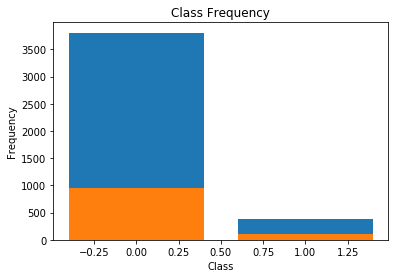

In [169]:
#OPTIONAL STEP
#Plot class frequencies
import matplotlib.pyplot as plt
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
unique, counts = np.unique(y_val, return_counts=True)
plt.bar(unique, counts)

plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')

plt.show()

In [170]:
#OPTIONAL STEP
# validation data class frequency
unique_elements, counts_elements = np.unique(y_val, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)).astype(int))

Frequency of unique values of the said array:
[[  0   1]
 [944 101]]


In [171]:
#STEP-5
#creating forest classifier
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier()
print(model_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [172]:
#STEP-6
#creating SVM classifier
from sklearn import svm
model_svm = svm.SVC(probability=True)
print(model_svm)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [173]:
#STEP-7
#creating LSTM model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(1,X_train.shape[1])))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 50)                16200     
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 51        
Total params: 16,251
Trainable params: 16,251
Non-trainable params: 0
_________________________________________________________________


In [174]:
#STEP-8
#creating 2d CNN
from keras.layers import Conv2D, Flatten

model_2dcnn = Sequential()
model_2dcnn.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(5,6,1)))
model_2dcnn.add(Conv2D(32, kernel_size=3, activation='relu'))
model_2dcnn.add(Flatten())
model_2dcnn.add(Dense(1, activation='sigmoid'))
model_2dcnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_2dcnn.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 3, 4, 64)          640       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 1, 2, 32)          18464     
_________________________________________________________________
flatten_7 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 65        
Total params: 19,169
Trainable params: 19,169
Non-trainable params: 0
_________________________________________________________________


In [175]:
#STEP-9
# creating simple neural network
model_ann=Sequential()
model_ann.add(Dense(64,input_shape=(X_train.shape[1],),activation='relu'))
model_ann.add(Dense(1,activation='sigmoid'))
model_ann.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_ann.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 64)                1984      
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 65        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________


In [0]:
#STEP-10
#creating 1D CNN
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout

model_1dcnn = Sequential()
model_1dcnn.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(1,X_train.shape[1])))
model_1dcnn.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
model_1dcnn.add(Dropout(0.5))
model_1dcnn.add(MaxPooling1D(pool_size=1))
model_1dcnn.add(Flatten())
model_1dcnn.add(Dense(100, activation='relu'))
model_1dcnn.add(Dense(1, activation='sigmoid'))
model_1dcnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [177]:
#STEP-11
#fit LSTM
model_lstm.fit(X_train.reshape(X_train.shape[0],1,X_train.shape[1]), y_train, validation_data=(X_val.reshape(X_val.shape[0],1,X_val.shape[1]), y_val), epochs=10)

Train on 4180 samples, validate on 1045 samples
Epoch 1/10
4180/4180 [==============================] - 3s 747us/step - loss: 0.4427 - acc: 0.9579 - val_loss: 0.2041 - val_acc: 0.9837
Epoch 2/10
4180/4180 [==============================] - 1s 126us/step - loss: 0.1177 - acc: 0.9847 - val_loss: 0.0786 - val_acc: 0.9847
Epoch 3/10
4180/4180 [==============================] - 1s 128us/step - loss: 0.0628 - acc: 0.9868 - val_loss: 0.0642 - val_acc: 0.9856
Epoch 4/10
4180/4180 [==============================] - 1s 131us/step - loss: 0.0513 - acc: 0.9888 - val_loss: 0.0602 - val_acc: 0.9856
Epoch 5/10
4180/4180 [==============================] - 0s 118us/step - loss: 0.0464 - acc: 0.9900 - val_loss: 0.0585 - val_acc: 0.9856
Epoch 6/10
4180/4180 [==============================] - 1s 122us/step - loss: 0.0435 - acc: 0.9914 - val_loss: 0.0575 - val_acc: 0.9847
Epoch 7/10
4180/4180 [==============================] - 1s 130us/step - loss: 0.0416 - acc: 0.9916 - val_loss: 0.0569 - val_acc: 0.9847


In [178]:
#STEP-12
#fiT 2D CNN
model_2dcnn.fit(X_train.reshape(X_train.shape[0],5,6,1), y_train, validation_data=(X_val.reshape(X_val.shape[0],5,6,1), y_val), epochs=10)

Train on 4180 samples, validate on 1045 samples
Epoch 1/10
4180/4180 [==============================] - 3s 617us/step - loss: 0.1294 - acc: 0.9727 - val_loss: 0.0767 - val_acc: 0.9809
Epoch 2/10
4180/4180 [==============================] - 0s 119us/step - loss: 0.0545 - acc: 0.9880 - val_loss: 0.0611 - val_acc: 0.9847
Epoch 3/10
4180/4180 [==============================] - 0s 118us/step - loss: 0.0464 - acc: 0.9902 - val_loss: 0.0571 - val_acc: 0.9847
Epoch 4/10
4180/4180 [==============================] - 1s 128us/step - loss: 0.0422 - acc: 0.9907 - val_loss: 0.0583 - val_acc: 0.9847
Epoch 5/10
4180/4180 [==============================] - 0s 119us/step - loss: 0.0389 - acc: 0.9914 - val_loss: 0.0548 - val_acc: 0.9847
Epoch 6/10
4180/4180 [==============================] - 1s 125us/step - loss: 0.0392 - acc: 0.9914 - val_loss: 0.0528 - val_acc: 0.9847
Epoch 7/10
4180/4180 [==============================] - 1s 123us/step - loss: 0.0376 - acc: 0.9909 - val_loss: 0.0533 - val_acc: 0.9847


In [179]:
#STEP-13
#fit simple neural network
model_ann.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Train on 4180 samples, validate on 1045 samples
Epoch 1/10
4180/4180 [==============================] - 2s 548us/step - loss: 0.3376 - acc: 0.8739 - val_loss: 0.1160 - val_acc: 0.9818
Epoch 2/10
4180/4180 [==============================] - 0s 55us/step - loss: 0.0851 - acc: 0.9835 - val_loss: 0.0736 - val_acc: 0.9828
Epoch 3/10
4180/4180 [==============================] - 0s 54us/step - loss: 0.0600 - acc: 0.9859 - val_loss: 0.0645 - val_acc: 0.9837
Epoch 4/10
4180/4180 [==============================] - 0s 53us/step - loss: 0.0514 - acc: 0.9868 - val_loss: 0.0606 - val_acc: 0.9856
Epoch 5/10
4180/4180 [==============================] - 0s 55us/step - loss: 0.0465 - acc: 0.9895 - val_loss: 0.0587 - val_acc: 0.9856
Epoch 6/10
4180/4180 [==============================] - 0s 56us/step - loss: 0.0435 - acc: 0.9904 - val_loss: 0.0568 - val_acc: 0.9856
Epoch 7/10
4180/4180 [==============================] - 0s 54us/step - loss: 0.0413 - acc: 0.9909 - val_loss: 0.0568 - val_acc: 0.9856
Epoch 

In [180]:
#STEP-14
#fit SVM
model_svm.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [181]:
#STEP-15
#fit RF
model_rf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [182]:
#STEP-16
# fit 1D CNN
model_1dcnn.fit(X_train.reshape(X_train.shape[0],1,X_train.shape[1]), y_train, validation_data=(X_val.reshape(X_val.shape[0],1,X_val.shape[1]), y_val), epochs=10)

Train on 4180 samples, validate on 1045 samples
Epoch 1/10
4180/4180 [==============================] - 3s 639us/step - loss: 0.1823 - acc: 0.9555 - val_loss: 0.0755 - val_acc: 0.9809
Epoch 2/10
4180/4180 [==============================] - 0s 77us/step - loss: 0.0635 - acc: 0.9861 - val_loss: 0.0622 - val_acc: 0.9856
Epoch 3/10
4180/4180 [==============================] - 0s 79us/step - loss: 0.0517 - acc: 0.9895 - val_loss: 0.0636 - val_acc: 0.9847
Epoch 4/10
4180/4180 [==============================] - 0s 78us/step - loss: 0.0474 - acc: 0.9904 - val_loss: 0.0652 - val_acc: 0.9847
Epoch 5/10
4180/4180 [==============================] - 0s 77us/step - loss: 0.0460 - acc: 0.9904 - val_loss: 0.0649 - val_acc: 0.9837
Epoch 6/10
4180/4180 [==============================] - 0s 80us/step - loss: 0.0380 - acc: 0.9916 - val_loss: 0.0634 - val_acc: 0.9885
Epoch 7/10
4180/4180 [==============================] - 0s 79us/step - loss: 0.0400 - acc: 0.9907 - val_loss: 0.0701 - val_acc: 0.9837
Epoch 

In [183]:
#STEP-17
# performance on validation dataset
from sklearn import metrics
X=X_val
y=y_val
y_pred=model_lstm.predict_classes(X.reshape(X.shape[0],1,30))
y_pred=np.append(y_pred,model_2dcnn.predict_classes(X.reshape(X.shape[0],5,6,1)),axis=1)
y_pred=np.append(y_pred,model_ann.predict_classes(X),axis=1)
y_pred=np.append(y_pred,model_rf.predict(X).reshape(X.shape[0],1),axis=1)
y_pred=np.append(y_pred,model_1dcnn.predict_classes(X.reshape(X.shape[0],1,30)),axis=1)
y_pred=np.append(y_pred,model_svm.predict(X).reshape(X.shape[0],1),axis=1)
print(y_pred.shape)

header=['LSTM','2DCNN','ANN','RF','1DCNN','SVM']

for x in range (len(y_pred[0])):
  print(header[x])
  print("Accuracy: "+"{:.2%}".format(metrics.accuracy_score(y, y_pred[:,x])))
  print("Precision: "+"{:.2%}".format(metrics.precision_score(y, y_pred[:,x])))
  print("Recall: "+"{:.2%}".format(metrics.recall_score(y, y_pred[:,x])))
  print("F1: "+"{:.2%}".format(metrics.f1_score(y,y_pred[:,x])))
  print(metrics.confusion_matrix(y,y_pred[:,x]))
  print("-----------")

(1045, 6)
LSTM
Accuracy: 98.47%
Precision: 98.85%
Recall: 85.15%
F1: 91.49%
[[943   1]
 [ 15  86]]
-----------
2DCNN
Accuracy: 98.66%
Precision: 98.88%
Recall: 87.13%
F1: 92.63%
[[943   1]
 [ 13  88]]
-----------
ANN
Accuracy: 98.47%
Precision: 98.85%
Recall: 85.15%
F1: 91.49%
[[943   1]
 [ 15  86]]
-----------
RF
Accuracy: 98.56%
Precision: 98.86%
Recall: 86.14%
F1: 92.06%
[[943   1]
 [ 14  87]]
-----------
1DCNN
Accuracy: 98.76%
Precision: 100.00%
Recall: 87.13%
F1: 93.12%
[[944   0]
 [ 13  88]]
-----------
SVM
Accuracy: 98.47%
Precision: 98.85%
Recall: 85.15%
F1: 91.49%
[[943   1]
 [ 15  86]]
-----------


In [184]:
# use this block to upload score file from local computer
uploaded2 = files.upload()

Saving score123.csv to score123 (3).csv


In [185]:
# use this block to read uploaded file for google colaboratory
df1 = pd.read_csv(io.BytesIO(uploaded2['score123.csv']),names=["Classifier", "Ratio", "Accuracy", "Precision", "Recall","F1"])
score=df1.to_numpy()
print(score)

[['LSTM' 1.0 19.55 0.21 100.0 0.42]
 ['2DCNN' 1.0 14.77 0.2 100.0 0.4]
 ['ANN' 1.0 12.9 0.19 100.0 0.39]
 ['RF' 1.0 1.7 0.17 100.0 0.34]
 ['1DCNN' 1.0 5.97 0.18 100.0 0.36]
 ['SVM' 1.0 1.12 0.17 100.0 0.34]]


In [0]:
#STEP-18
#use this block to read score file locally
#create an empty score.csv file to save classifier results
df1 = pd.read_csv('score.csv',names=["Classifier", "Ratio", "Accuracy", "Precision", "Recall","F1"])
score=df1.to_numpy()
print(score)

In [189]:
#STEP-19
#performance on test dataset
X=X_test
y=y_test
y_pred=model_lstm.predict_classes(X.reshape(X.shape[0],1,X.shape[1]))
y_pred=np.append(y_pred,model_2dcnn.predict_classes(X.reshape(X.shape[0],5,6,1)),axis=1)
y_pred=np.append(y_pred,model_ann.predict_classes(X),axis=1)
y_pred=np.append(y_pred,model_rf.predict(X).reshape(X.shape[0],1),axis=1)
y_pred=np.append(y_pred,model_1dcnn.predict_classes(X.reshape(X.shape[0],1,X.shape[1])),axis=1)
y_pred=np.append(y_pred,model_svm.predict(X).reshape(X.shape[0],1),axis=1)
print(y_pred.shape)

header=['LSTM','2DCNN','ANN','RF','1DCNN','SVM']

for x in range (len(y_pred[0])):
  score_row=header[x]
  print(header[x])
  score_row=np.append(score_row,np.round(ratio,2))
  print(ratio)
  score_row=np.append(score_row, np.round(metrics.accuracy_score(y, y_pred[:,x])*100,2))
  print("Accuracy: "+"{:.2%}".format(metrics.accuracy_score(y, y_pred[:,x])))
  score_row=np.append(score_row, np.round(metrics.precision_score(y, y_pred[:,x])*100,2))
  print("Precision: "+"{:.2%}".format(metrics.precision_score(y, y_pred[:,x])))
  score_row=np.append(score_row, np.round(metrics.recall_score(y, y_pred[:,x])*100,2))
  print("Recall: "+"{:.2%}".format(metrics.recall_score(y, y_pred[:,x])))
  score_row=np.append(score_row, np.round(metrics.f1_score(y,y_pred[:,x])*100,2))
  print("F1: "+"{:.2%}".format(metrics.f1_score(y,y_pred[:,x])))
  print(metrics.confusion_matrix(y,y_pred[:,x]))
  print(score_row)
  print(score_row.shape)
  print("-----------")
  score=np.vstack((score,score_row))

(10017, 6)
LSTM
0.1
Accuracy: 92.43%
Precision: 2.07%
Recall: 94.12%
F1: 4.05%
[[9243  757]
 [   1   16]]
['LSTM' '0.1' '92.43' '2.07' '94.12' '4.05']
(6,)
-----------
2DCNN
0.1
Accuracy: 92.54%
Precision: 2.10%
Recall: 94.12%
F1: 4.11%
[[9254  746]
 [   1   16]]
['2DCNN' '0.1' '92.54' '2.1' '94.12' '4.11']
(6,)
-----------
ANN
0.1
Accuracy: 94.96%
Precision: 3.08%
Recall: 94.12%
F1: 5.96%
[[9496  504]
 [   1   16]]
['ANN' '0.1' '94.96' '3.08' '94.12' '5.96']
(6,)
-----------
RF
0.1
Accuracy: 86.37%
Precision: 1.16%
Recall: 94.12%
F1: 2.29%
[[8636 1364]
 [   1   16]]
['RF' '0.1' '86.37' '1.16' '94.12' '2.29']
(6,)
-----------
1DCNN
0.1
Accuracy: 94.51%
Precision: 2.83%
Recall: 94.12%
F1: 5.50%
[[9451  549]
 [   1   16]]
['1DCNN' '0.1' '94.51' '2.83' '94.12' '5.5']
(6,)
-----------
SVM
0.1
Accuracy: 95.54%
Precision: 3.46%
Recall: 94.12%
F1: 6.68%
[[9554  446]
 [   1   16]]
['SVM' '0.1' '95.54' '3.46' '94.12' '6.68']
(6,)
-----------


In [187]:
print(score)

[['LSTM' 1.0 19.55 0.21 100.0 0.42]
 ['2DCNN' 1.0 14.77 0.2 100.0 0.4]
 ['ANN' 1.0 12.9 0.19 100.0 0.39]
 ['RF' 1.0 1.7 0.17 100.0 0.34]
 ['1DCNN' 1.0 5.97 0.18 100.0 0.36]
 ['SVM' 1.0 1.12 0.17 100.0 0.34]
 ['LSTM' '0.1' '92.43' '2.07' '94.12' '4.05']
 ['2DCNN' '0.1' '92.54' '2.1' '94.12' '4.11']
 ['ANN' '0.1' '94.96' '3.08' '94.12' '5.96']
 ['RF' '0.1' '86.37' '1.16' '94.12' '2.29']
 ['1DCNN' '0.1' '94.51' '2.83' '94.12' '5.5']
 ['SVM' '0.1' '95.54' '3.46' '94.12' '6.68']]


In [0]:
#use this to write results on score.csv while using google colab
pd.DataFrame(score).to_csv("score.csv",header=None, index=None)
files.download("score.csv")

In [0]:
#STEP-20
#write results onto the score.csv file
#use this block if running locally
pd.DataFrame(score).to_csv("score.csv",header=None, index=None)

In [150]:
import tensorflow as tf
tf.__version__

'1.15.0'

In [151]:
import keras
print(keras.__version__)

2.2.5


In [152]:
import sys
sys.version

'3.6.9 (default, Nov  7 2019, 10:44:02) \n[GCC 8.3.0]'